In [1]:
import math
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./datasets/combined.xlsx')
df.head()

,Unnamed: 0,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
1,1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2,2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
3,3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
4,4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3


In [3]:
df.dropna(inplace=True)

In [4]:
df

,Unnamed: 0,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
1,1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2,2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
3,3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
4,4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60563,60563,Public Housing,2021,6,West Region,Choa Chu Kang,470.8,9.8,6.1,7.8,9.4,28.1,32.7,24.5,8.6,31.9
60564,60564,Public Housing,2021,6,West Region,Clementi,360.1,7.5,4.4,5.4,6.7,28.2,32.1,25.2,4.9,26.5
60565,60565,Public Housing,2021,6,West Region,Jurong East,434.2,8.5,5.3,6.5,7.9,28.2,32.4,24.9,6.7,29.2
60566,60566,Public Housing,2021,6,West Region,Jurong West,435.8,8.5,5.3,6.5,7.9,28.2,32.4,24.9,6.7,29.2


In [5]:
df["Avg kWh"] = pd.to_numeric(df["Avg kWh"], downcast="integer")

In [6]:
df['Year'] =df['Year'].astype(int)
df.sort_values(by=['Year', 'Month'], inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df.set_index(df['Date'])
df.head()

,Unnamed: 0,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date
Date,,,,,,,,,,,,,,,,,
2005-01-01,0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01


In [8]:
df

,Unnamed: 0,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date
Date,,,,,,,,,,,,,,,,,
2005-01-01,0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,60563,Public Housing,2021,6,West Region,Choa Chu Kang,470.8,9.8,6.1,7.8,9.4,28.1,32.7,24.5,8.6,31.9,2021-06-01
2021-06-01,60564,Public Housing,2021,6,West Region,Clementi,360.1,7.5,4.4,5.4,6.7,28.2,32.1,25.2,4.9,26.5,2021-06-01
2021-06-01,60565,Public Housing,2021,6,West Region,Jurong East,434.2,8.5,5.3,6.5,7.9,28.2,32.4,24.9,6.7,29.2,2021-06-01


In [9]:
central_region = df[df['Region'] == 'Central Region']

In [10]:
central_region.head()

,Unnamed: 0,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date
Date,,,,,,,,,,,,,,,,,
2005-01-01,0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01
2005-01-01,4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3,2005-01-01


Group by each region, get average

In [11]:
central_df = central_region.groupby(central_region.index).mean()

In [12]:
central_df.head()

,Unnamed: 0,Year,Month,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Date,,,,,,,,,,,,,
2005-01-01,26721.306452,2005.0,1.0,610.964516,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2005-02-01,26875.233871,2005.0,2.0,578.331452,2.2,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2005-03-01,26913.830645,2005.0,3.0,616.065323,4.2,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2005-04-01,26952.427419,2005.0,4.0,715.820968,9.0,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2005-05-01,26991.024194,2005.0,5.0,709.203226,9.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3


In [13]:
central_df.drop(['Unnamed: 0','Daily Rainfall Total (mm)','Highest 30 min Rainfall (mm)','Highest 60 min Rainfall (mm)'],axis=1, inplace=True)

In [14]:
central_df_without_2d = central_df.copy()

In [15]:
import math

In [16]:
central_df['Month']=central_df['Month']*5

In [18]:
def x(a):
   return math.sin(a)
def y(a):
   return math.cos(a)

In [19]:
central_df['monthx'] = central_df['Month'].apply(x)
central_df['monthy']  =central_df['Month'].apply(y)

In [20]:
central_df.drop(['Month'],axis=1, inplace=True)

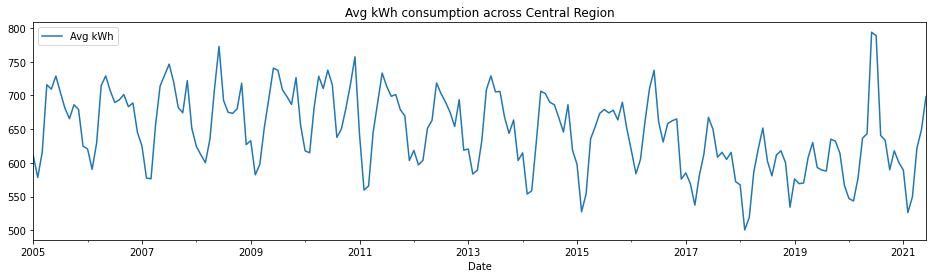

In [21]:
central_df['Avg kWh'].plot(figsize=(16,4),legend=True)
plt.title('Avg kWh consumption across Central Region')
plt.show()

# Preparing data for comparison

In [22]:
central_df.head()

,Year,Avg kWh,Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),monthx,monthy
Date,,,,,,,,,,
2005-01-01,2005.0,610.964516,5.0,27.5,31.3,25.1,7.2,35.3,-0.958924,0.283662
2005-02-01,2005.0,578.331452,5.0,27.5,31.3,25.1,7.2,35.3,-0.544021,-0.839072
2005-03-01,2005.0,616.065323,5.0,27.5,31.3,25.1,7.2,35.3,0.650288,-0.759688
2005-04-01,2005.0,715.820968,5.0,27.5,31.3,25.1,7.2,35.3,0.912945,0.408082
2005-05-01,2005.0,709.203226,5.0,27.5,31.3,25.1,7.2,35.3,-0.132352,0.991203


In [23]:
central_df_without_2d.head()

,Year,Month,Avg kWh,Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Date,,,,,,,,,
2005-01-01,2005.0,1.0,610.964516,5.0,27.5,31.3,25.1,7.2,35.3
2005-02-01,2005.0,2.0,578.331452,5.0,27.5,31.3,25.1,7.2,35.3
2005-03-01,2005.0,3.0,616.065323,5.0,27.5,31.3,25.1,7.2,35.3
2005-04-01,2005.0,4.0,715.820968,5.0,27.5,31.3,25.1,7.2,35.3
2005-05-01,2005.0,5.0,709.203226,5.0,27.5,31.3,25.1,7.2,35.3


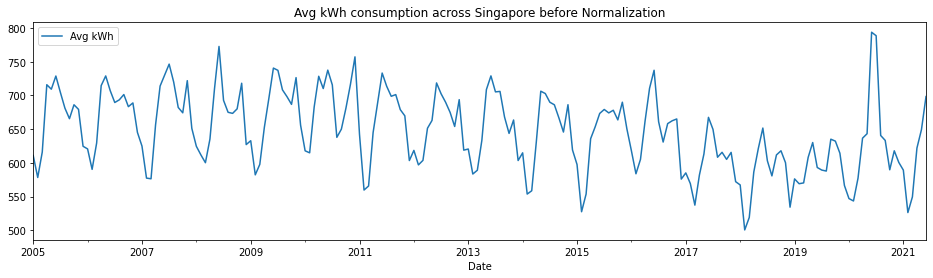

In [24]:
central_df['Avg kWh'].plot(figsize=(16,4),legend=True)
plt.title('Avg kWh consumption across Singapore before Normalization')
plt.show()

In [25]:
import sklearn.preprocessing
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['Avg kWh']=scaler.fit_transform(df['Avg kWh'].values.reshape(-1,1))
    df['Year']=scaler.fit_transform(df['Year'].values.reshape(-1,1))
    df['monthx']=scaler.fit_transform(df['monthx'].values.reshape(-1,1))
    df['monthy']=scaler.fit_transform(df['monthy'].values.reshape(-1,1))
    df['Highest 120 min Rainfall (mm)']=scaler.fit_transform(df['Highest 120 min Rainfall (mm)'].values.reshape(-1,1))
    df['Mean Temperature (°C)']=scaler.fit_transform(df['Mean Temperature (°C)'].values.reshape(-1,1))
    df['Maximum Temperature (°C)']=scaler.fit_transform(df['Maximum Temperature (°C)'].values.reshape(-1,1))
    df['Minimum Temperature (°C)']=scaler.fit_transform(df['Minimum Temperature (°C)'].values.reshape(-1,1))
    df['Mean Wind Speed (km/h)']=scaler.fit_transform(df['Mean Wind Speed (km/h)'].values.reshape(-1,1))
    df['Max Wind Speed (km/h)']=scaler.fit_transform(df['Max Wind Speed (km/h)'].values.reshape(-1,1))

    return df

central_df = normalize_data(central_df)
central_df.shape

(198, 10)

In [26]:
import sklearn.preprocessing
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['Avg kWh']=scaler.fit_transform(df['Avg kWh'].values.reshape(-1,1))
    df['Year']=scaler.fit_transform(df['Year'].values.reshape(-1,1))
    df['Month']=scaler.fit_transform(df['Month'].values.reshape(-1,1))
    df['Highest 120 min Rainfall (mm)']=scaler.fit_transform(df['Highest 120 min Rainfall (mm)'].values.reshape(-1,1))
    df['Mean Temperature (°C)']=scaler.fit_transform(df['Mean Temperature (°C)'].values.reshape(-1,1))
    df['Maximum Temperature (°C)']=scaler.fit_transform(df['Maximum Temperature (°C)'].values.reshape(-1,1))
    df['Minimum Temperature (°C)']=scaler.fit_transform(df['Minimum Temperature (°C)'].values.reshape(-1,1))
    df['Mean Wind Speed (km/h)']=scaler.fit_transform(df['Mean Wind Speed (km/h)'].values.reshape(-1,1))
    df['Max Wind Speed (km/h)']=scaler.fit_transform(df['Max Wind Speed (km/h)'].values.reshape(-1,1))
    return df

central_df_without_2d = normalize_data(central_df_without_2d)
central_df_without_2d.shape

(198, 9)

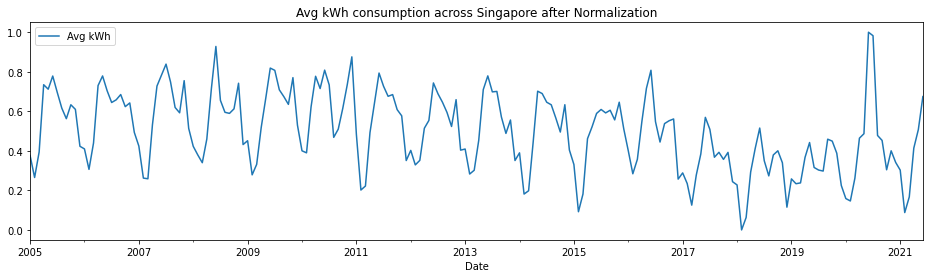

In [27]:
central_df['Avg kWh'].plot(figsize=(16,4),legend=True)
plt.title('Avg kWh consumption across Singapore after Normalization')
plt.show()

In [28]:
central_df = central_df.reset_index()
central_df_without_2d = central_df_without_2d.reset_index()

In [29]:
central_df.drop('Date', axis=1, inplace=True)
central_df_without_2d.drop('Date', axis=1, inplace=True)

In [30]:
central_df.head()

,Year,Avg kWh,Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),monthx,monthy
0,0.0,0.376564,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204,0.021347,0.635967
1,0.0,0.265170,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204,0.238267,0.058315
2,0.0,0.393976,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204,0.862677,0.099158
3,0.0,0.734494,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204,1.000000,0.699981
4,0.0,0.711904,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204,0.453497,1.000000


In [31]:
central_df_without_2d.head()

,Year,Month,Avg kWh,Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0.0,0.000000,0.376564,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
1,0.0,0.090909,0.265170,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
2,0.0,0.181818,0.393976,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
3,0.0,0.272727,0.734494,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
4,0.0,0.363636,0.711904,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204


Try LR with 2D conversion

In [32]:
# Training and testing only accept matrix not data frame
X = central_df
y = central_df['Avg kWh']
del X['Avg kWh']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
lr = LinearRegression()
# fitting the training data
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
eval_results = {}
def perform_eval(model, model_name):
    #Mean squared error 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #Train
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    #Test
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    #R Squared Score
    #Train
    r2train = model.score(X_train, y_train)
    adjr2_train = 1 - (1-r2train) * (len(y)-1)/(len(y)-X.shape[1]-1)
    #Test
    r2test = model.score(X_test, y_test)
    adjr2_test = 1 - (1-r2test) * (len(y)-1)/(len(y)-X.shape[1]-1)
    
    eval_results[model_name] = {
        "MSE (Train)" : mse_train,
        "MSE (Test)" : mse_test,
        "RMSE (Train)" : rmse_train,
        "RMSE (Test)" : rmse_test,
        "R2 (Train)" : r2train,
        "R2 (Test)" : r2test,
        "Adj R2 (Train)" : adjr2_train,
        "Adj R2 (Test)" : adjr2_test
    }
    
    return eval_results[model_name]

In [36]:
res_val = perform_eval(lr, "Linear Regression (2D)")
for key in res_val:
    print(f"{key}: {res_val[key]}")

MSE (Train): 0.020981089996800123
MSE (Test): 0.01935575258772173
RMSE (Train): 0.1448485070575466
RMSE (Test): 0.13912495314544307
R2 (Train): 0.4469072095093126
R2 (Test): 0.49048350831993337
Adj R2 (Train): 0.4204293631560351
Adj R2 (Test): 0.4660917613778025


Try LR with 1D (Original)

In [37]:
central_df_without_2d.head()

,Year,Month,Avg kWh,Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0.0,0.000000,0.376564,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
1,0.0,0.090909,0.265170,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
2,0.0,0.181818,0.393976,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
3,0.0,0.272727,0.734494,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204
4,0.0,0.363636,0.711904,0.476423,0.594595,0.543478,0.627907,0.333333,0.310204


In [38]:
# Training and testing only accept matrix not data frame
X = central_df_without_2d
y = central_df_without_2d['Avg kWh']
del X['Avg kWh']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
lr = LinearRegression()
# fitting the training data
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
res_val = perform_eval(lr, "Linear Regression (2D)")
for key in res_val:
    print(f"{key}: {res_val[key]}")

MSE (Train): 0.021273859941133424
MSE (Test): 0.017219079010181094
RMSE (Train): 0.14585561333432945
RMSE (Test): 0.13122148837054506
R2 (Train): 0.4391893576003887
R2 (Test): 0.5467288245462112
Adj R2 (Train): 0.4154513409908813
Adj R2 (Test): 0.5275427430455217


# Seems that performance is better when we do not convert Month to a 2D